In [1]:
# General
import os
from os.path import join

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# Data wrangling
import pandas as pd
from objects import Dataset, Clustering

In [28]:
CURRENT_DIR = os.getcwd()
balanced_df = pd.read_pickle(join(CURRENT_DIR, '..' , 'Data', 'Dataframes', 'balanced_df.pkl'))
enzyme_df = pd.read_pickle(join(CURRENT_DIR, '..' , 'Data', 'Dataframes', 'enzyme_df_sequences.pkl'))

In [29]:
def grab_first(string):
    return int(string[0])

In [30]:
enzyme_df['ec'] = enzyme_df['ec_number'].apply(grab_first)

<Axes: title={'center': 'Number of Enzymes per EC Class'}, xlabel='EC Class', ylabel='Enzymes'>

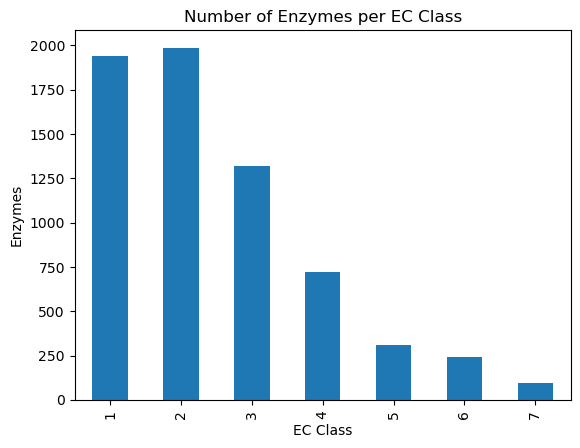

In [31]:
enzyme_df.groupby('ec').count()['ec_number'].plot(kind = 'bar', ylabel = 'Enzymes', xlabel = 'EC Class', title = 'Number of Enzymes per EC Class')

In [32]:
data = Dataset(balanced_df)
featurised = data.featurise_df('enzyme', 'ESM1b')

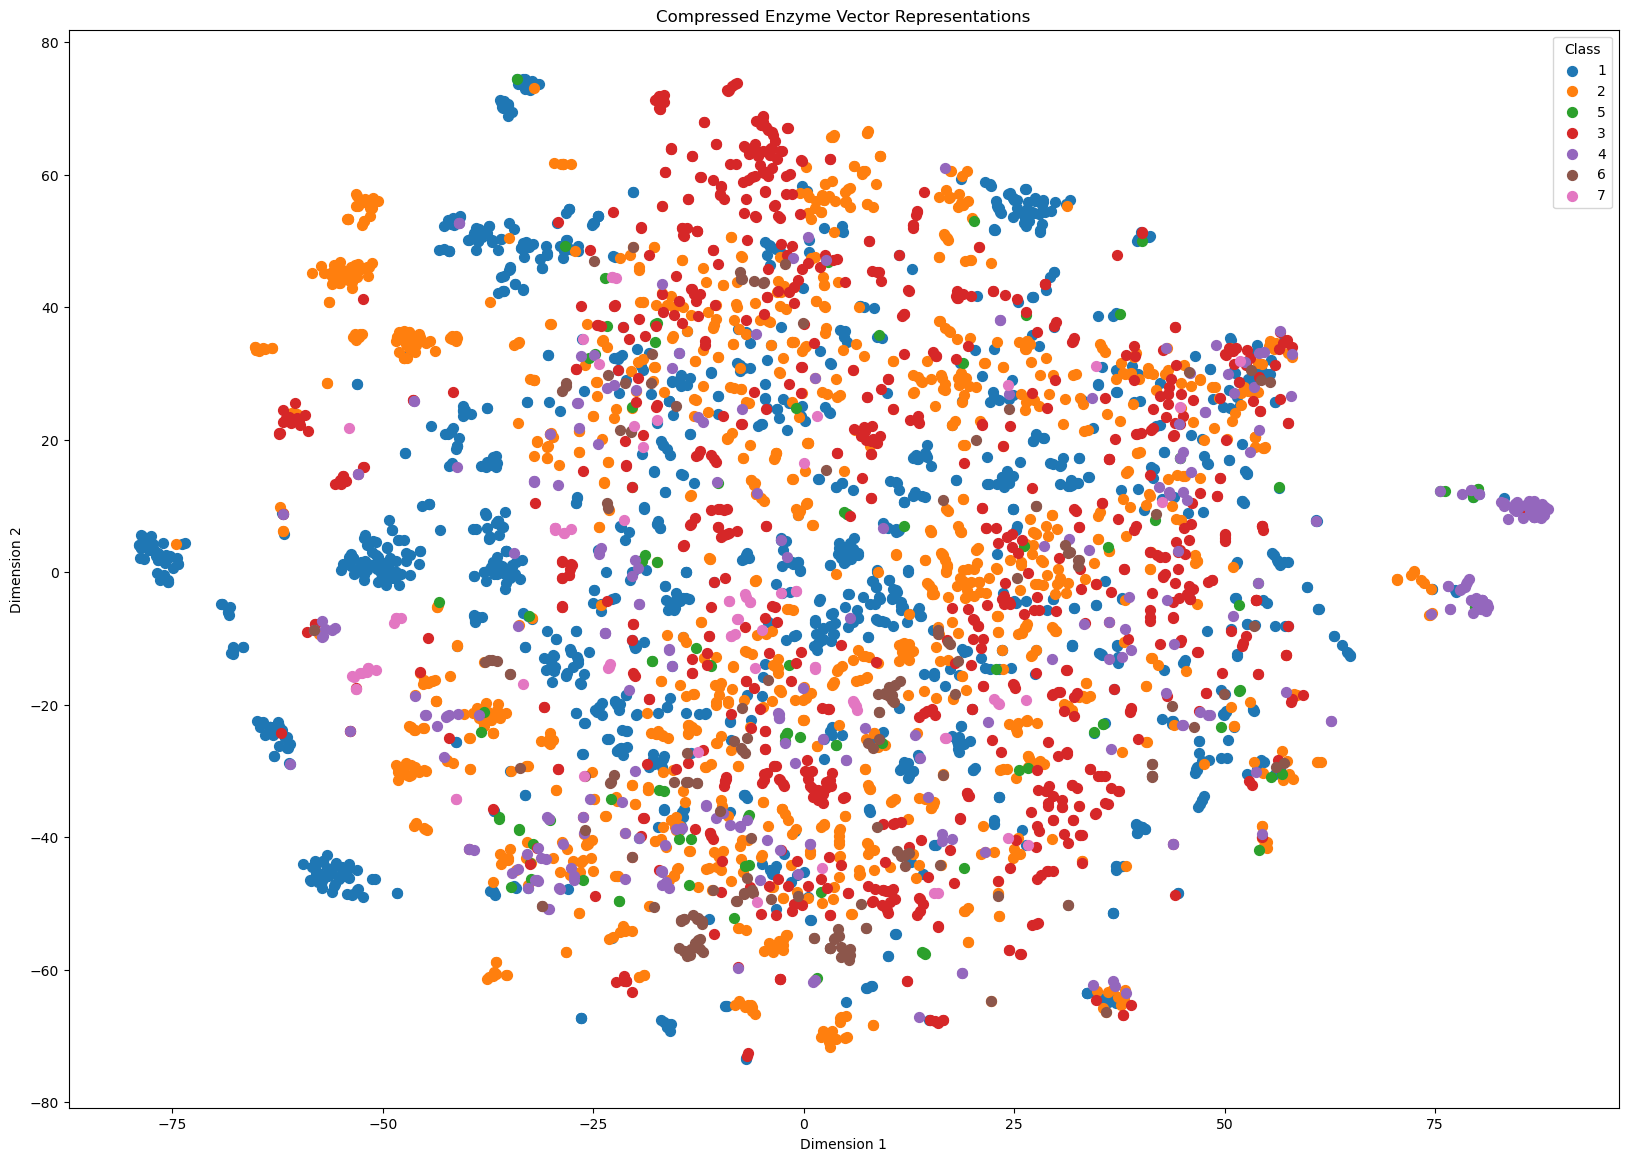

In [33]:
enzymes = featurised.merge(right = enzyme_df, left_on = 'enzyme', right_on = 'enzyme', how = 'left').drop(columns = ['ec_number', 'systematic_name', 'reaction_type', 'substrates', 'products', 'sequence', 'enzyme']).reset_index(drop=True)
#enzymes = enzymes[(enzymes['ec'] == 4) | (enzymes['ec'] == 3)].reset_index(drop=True)

X = enzymes.iloc[:, :1280]
y = enzymes.iloc[:, 1280]

# Perform PCA
pca = TSNE(n_components=2)
principalComponents = pca.fit_transform(X)

# Create a new dataframe with the principal components
principal_df = pd.DataFrame(data=principalComponents, columns=['principal_component_1', 'principal_component_2'])

# Add the 1281st column to the new dataframe for coloring
principal_df['color'] = y

# Create a list of distinct colors
unique_classes = principal_df['color'].unique()
num_classes = len(unique_classes)
palette = sns.color_palette("tab10", num_classes)

# Plotting the scatter plot
plt.figure(figsize=(20, 14))

# Plot each class with a different color
for i, unique_class in enumerate(unique_classes):
    subset = principal_df[principal_df['color'] == unique_class]
    plt.scatter(subset['principal_component_1'], subset['principal_component_2'], 
                s=50, label=unique_class, color=palette[i])

plt.title('Compressed Enzyme Vector Representations')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Class')
plt.show()

In [7]:
pairs = data.featurise_df('both', 'both')

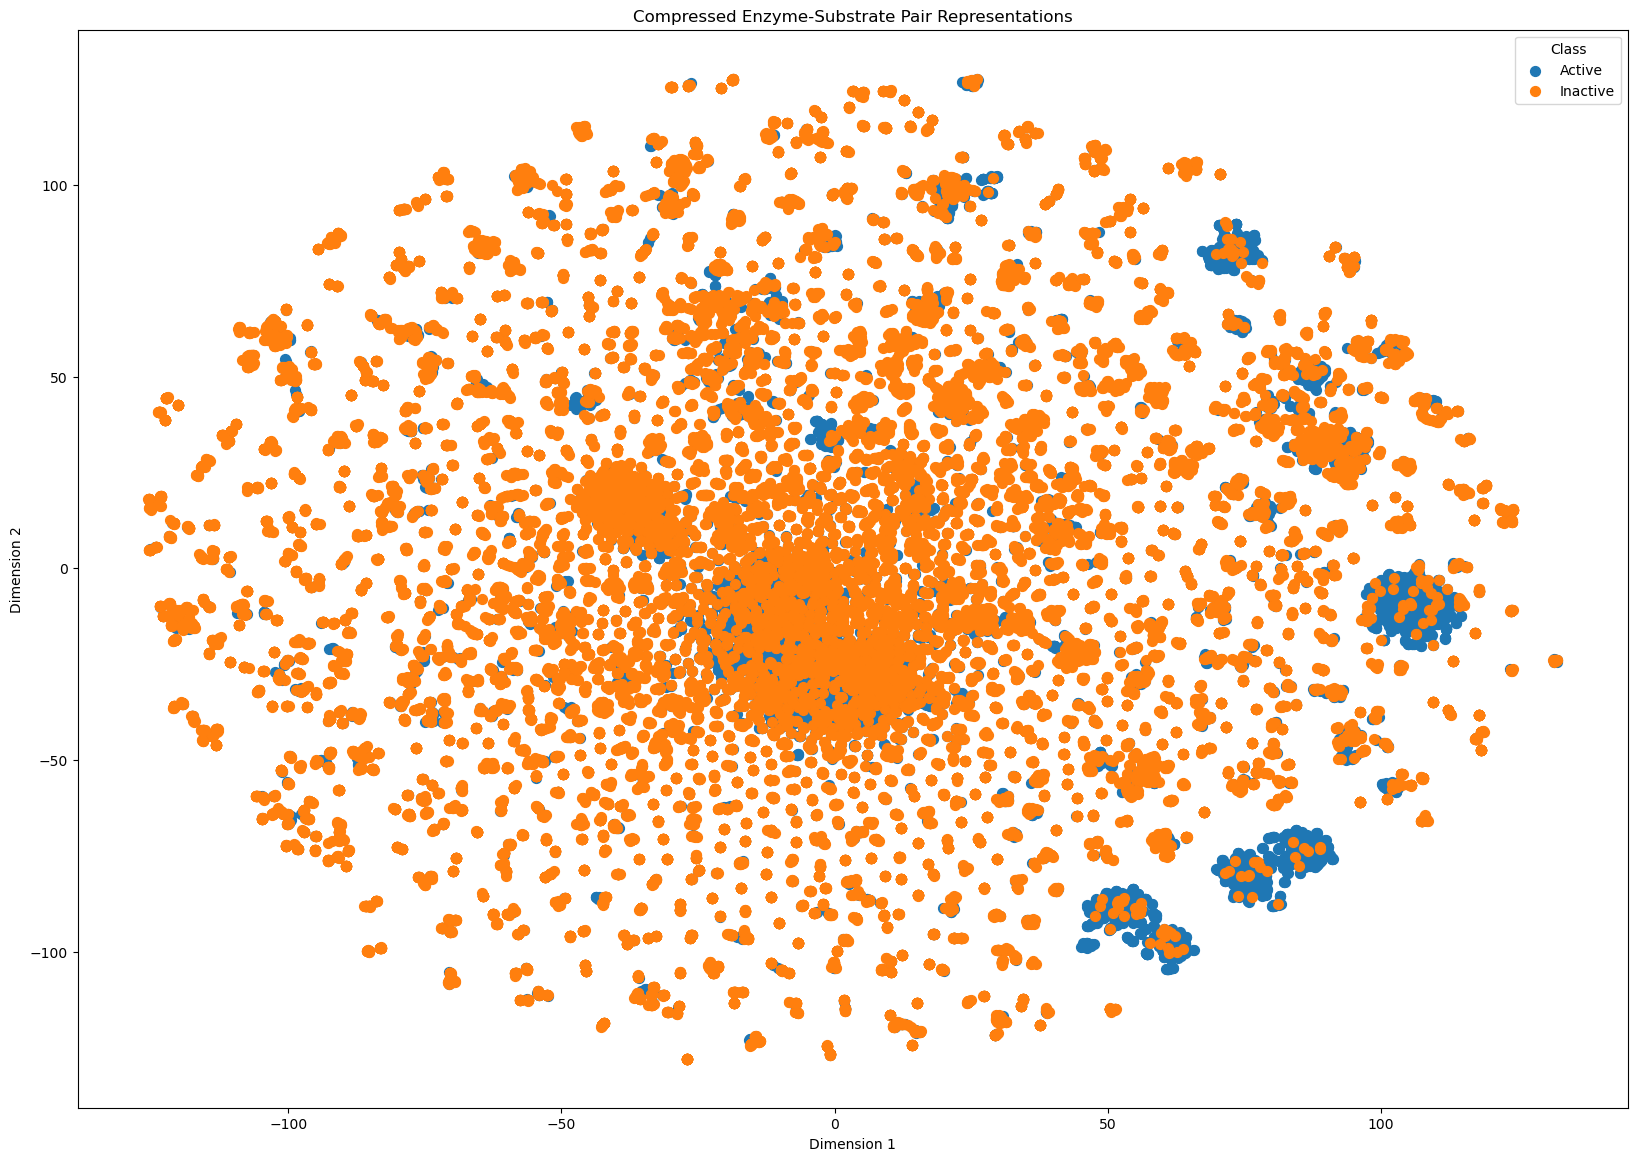

In [34]:
X = pairs.iloc[:, 3:]
y = pairs.iloc[:, 2]

# Perform PCA
pca = TSNE(n_components=2)
principalComponents = pca.fit_transform(X)

# Create a new dataframe with the principal components
principal_df = pd.DataFrame(data=principalComponents, columns=['principal_component_1', 'principal_component_2'])

# Add the 1281st column to the new dataframe for coloring
principal_df['color'] = y.map({1: 'Active', 0: 'Inactive'})

# Create a list of distinct colors
unique_classes = principal_df['color'].unique()
num_classes = len(unique_classes)
palette = sns.color_palette("tab10", num_classes)

# Plotting the scatter plot
plt.figure(figsize=(20, 14))

# Plot each class with a different color
for i, unique_class in enumerate(unique_classes):
    subset = principal_df[principal_df['color'] == unique_class]
    plt.scatter(subset['principal_component_1'], subset['principal_component_2'], 
                s=50, label=unique_class, color=palette[i])

plt.title('Compressed Enzyme-Substrate Pair Representations')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Class')
plt.show()

### Clustering Visualisations

In [5]:
data = Dataset(balanced_df)
featurised = data.featurise_df('substrate', 'fingerprint')

In [38]:
enzyme_dfs = {}
for i in range (1,8):
    enzyme_dfs[i] = balanced_df[balanced_df['ec_number'].str.startswith(str(i))]
    enzyme_dfs[i] = Dataset(enzyme_dfs[i])
    enzyme_dfs[i] = enzyme_dfs[i].featurise_df('substrate', 'fingerprint')

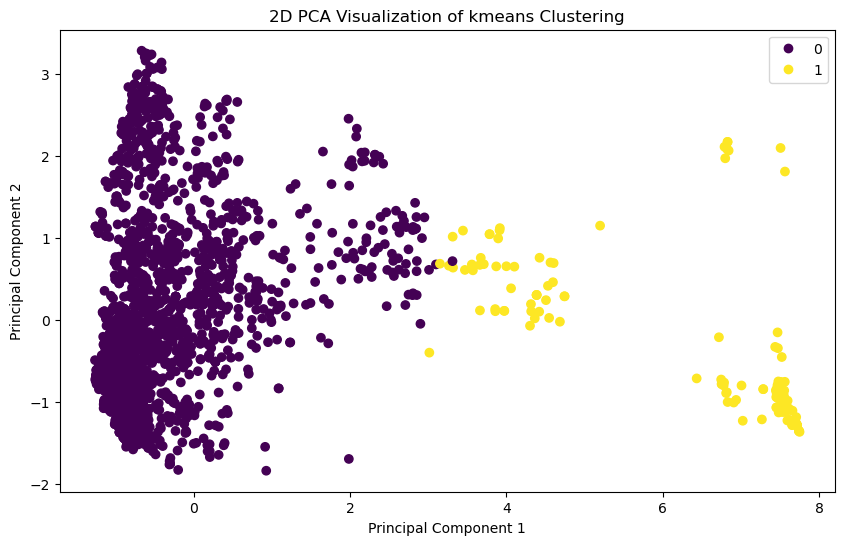

{'Silhouette Score': 0.2840663474507463,
 'Davies-Bouldin Score': 1.4184750083902475}

In [39]:
clustering = Clustering(method = 'kmeans', n_clusters = 2)
clustering.cluster(enzyme_dfs[1])
clustering.visualise(enzyme_dfs[1])
clustering.evaluate(enzyme_dfs[1])

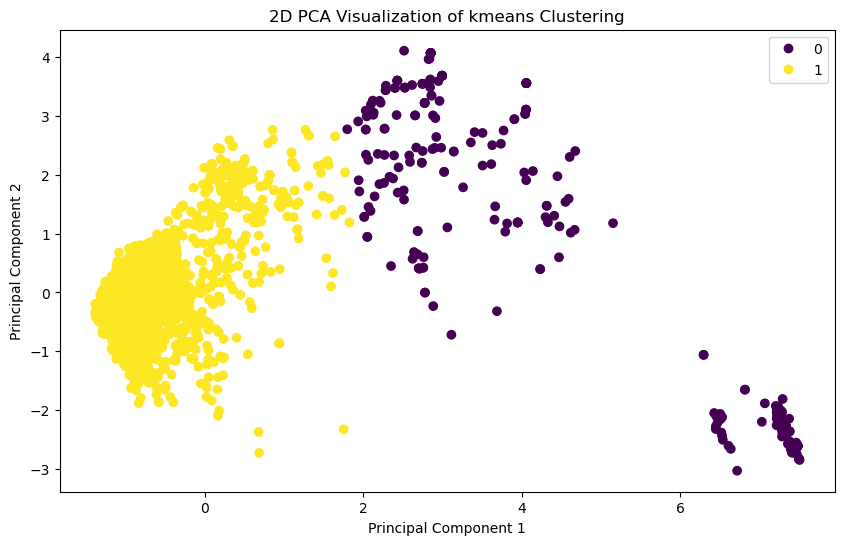

{'Silhouette Score': 0.2351510227545466,
 'Davies-Bouldin Score': 1.968978686060568}

In [40]:
clustering = Clustering(method = 'kmeans', n_clusters = 2)
clustering.cluster(enzyme_dfs[2])
clustering.visualise(enzyme_dfs[2])
clustering.evaluate(enzyme_dfs[2])

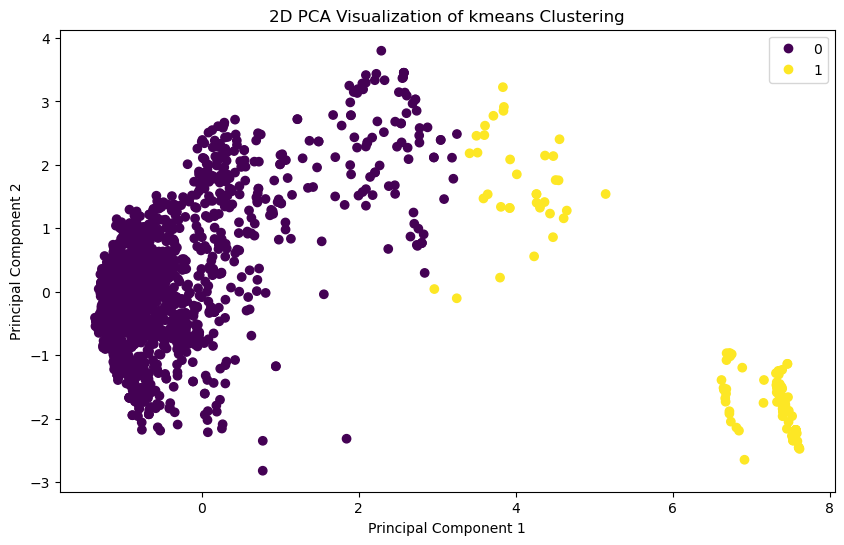

{'Silhouette Score': 0.2752106436660032,
 'Davies-Bouldin Score': 1.4390945247709568}

In [41]:
clustering = Clustering(method = 'kmeans', n_clusters = 2)
clustering.cluster(enzyme_dfs[3])
clustering.visualise(enzyme_dfs[3])
clustering.evaluate(enzyme_dfs[3])

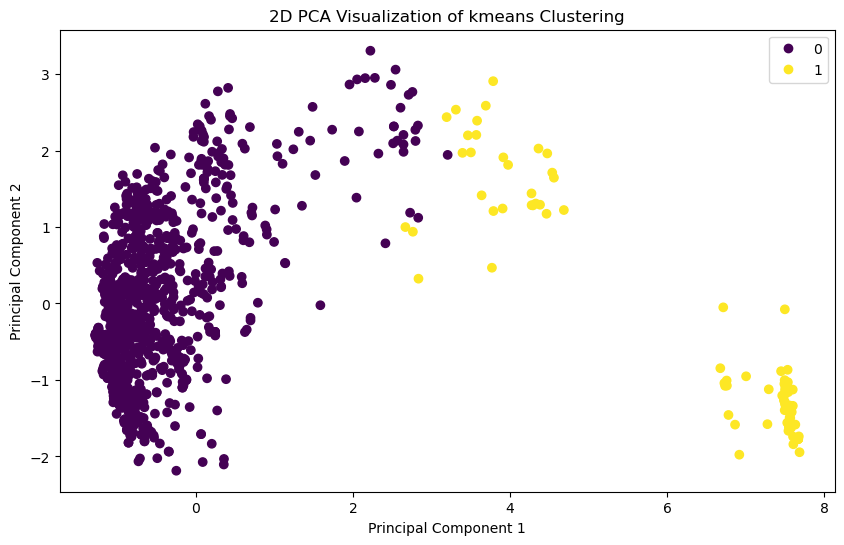

{'Silhouette Score': 0.2801661062124054,
 'Davies-Bouldin Score': 1.444356171891581}

In [42]:
clustering = Clustering(method = 'kmeans', n_clusters = 2)
clustering.cluster(enzyme_dfs[4])
clustering.visualise(enzyme_dfs[4])
clustering.evaluate(enzyme_dfs[4])

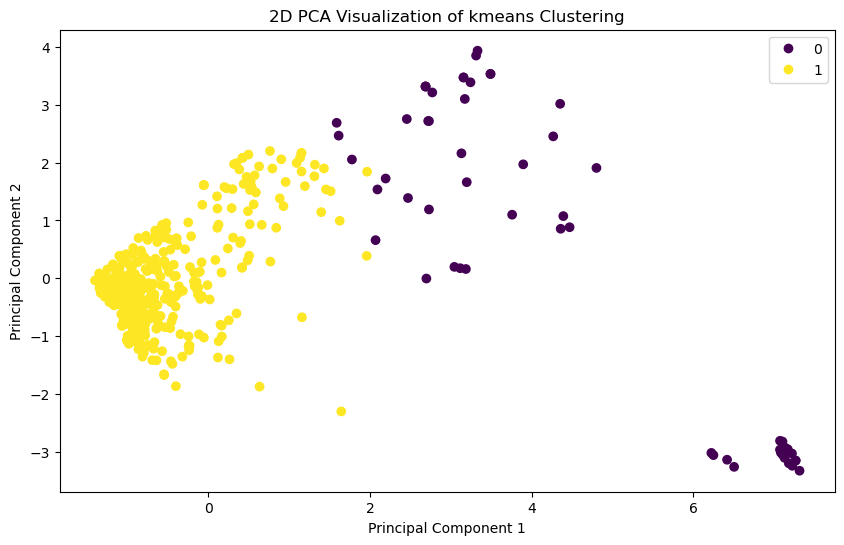

{'Silhouette Score': 0.23247252856597578,
 'Davies-Bouldin Score': 2.1287700370873015}

In [43]:
clustering = Clustering(method = 'kmeans', n_clusters = 2)
clustering.cluster(enzyme_dfs[5])
clustering.visualise(enzyme_dfs[5])
clustering.evaluate(enzyme_dfs[5])

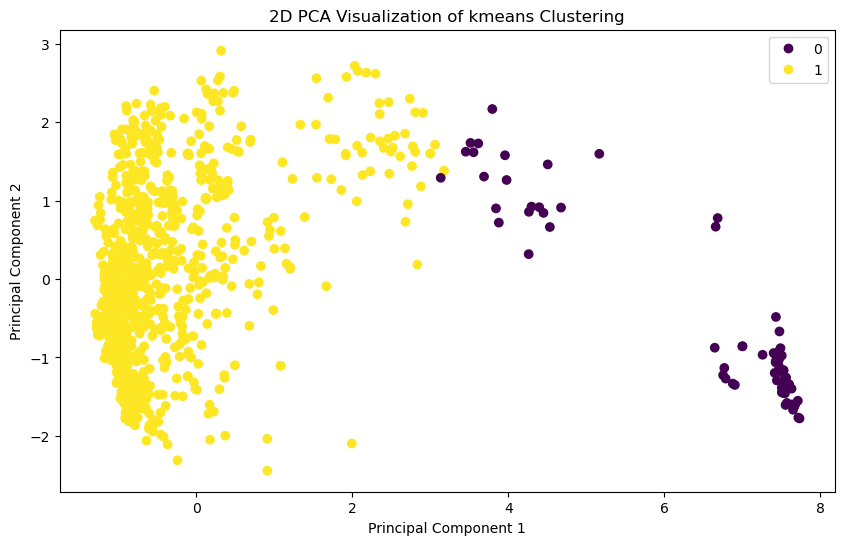

{'Silhouette Score': 0.276229189526931,
 'Davies-Bouldin Score': 1.3739304310155247}

In [44]:
clustering = Clustering(method = 'kmeans', n_clusters = 2)
clustering.cluster(enzyme_dfs[6])
clustering.visualise(enzyme_dfs[6])
clustering.evaluate(enzyme_dfs[6])

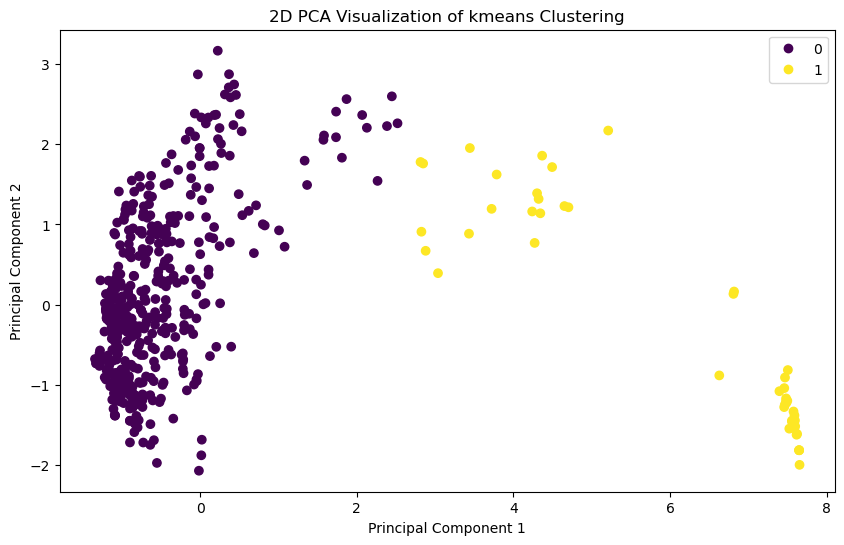

{'Silhouette Score': 0.2833362604446001,
 'Davies-Bouldin Score': 1.4913113802527884}

In [45]:
clustering = Clustering(method = 'kmeans', n_clusters = 2)
clustering.cluster(enzyme_dfs[7])
clustering.visualise(enzyme_dfs[7])
clustering.evaluate(enzyme_dfs[7])

### Analysis of False Negatives

In [12]:
wrongly_classified_df = pd.read_pickle(join(CURRENT_DIR, '..' , 'Data', 'Dataframes', 'wrongly_classified_df.pkl'))
false_negs_df = wrongly_classified_df[(wrongly_classified_df['true_label'] == 1) & (wrongly_classified_df['predicted_label'] == 0)]

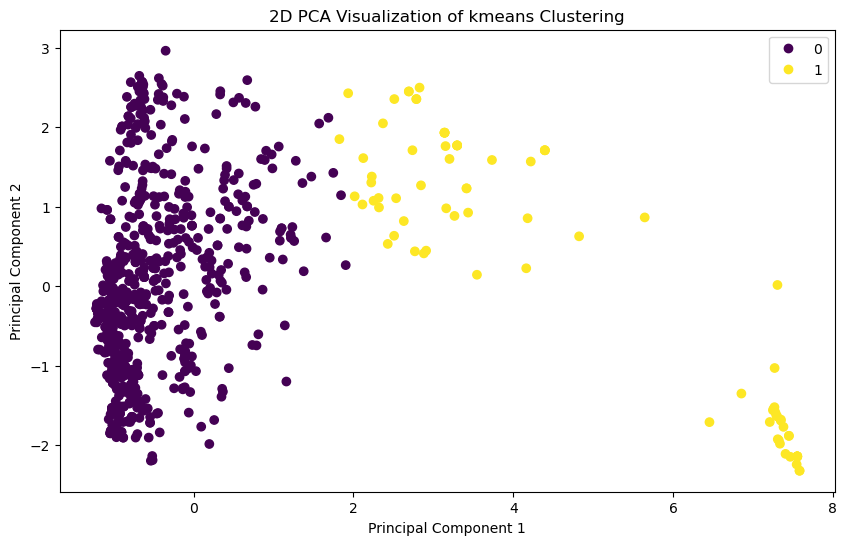

{'Silhouette Score': 0.2450810522561654,
 'Davies-Bouldin Score': 2.0327276830363616}

In [22]:
data = Dataset(false_negs_df)
false_negs = data.featurise_df('substrate', 'fingerprint')
clustering = Clustering(method = 'kmeans', n_clusters = 2)
clustering.cluster(false_negs)
clustering.visualise(false_negs)
clustering.evaluate(false_negs)

In [24]:
false_negs_df['substrate'].value_counts()

substrate
glyoxylate            7
NH3                   7
L-tyrosine            6
H2O2                  6
AH2                   6
                     ..
citral                1
glyoxylic acid        1
1-butanol             1
formylmethanofuran    1
D-Phe                 1
Name: count, Length: 780, dtype: int64

### Analysis of False Positives

In [15]:
false_pos_df = wrongly_classified_df[(wrongly_classified_df['true_label'] == 0) & (wrongly_classified_df['predicted_label'] == 1)]

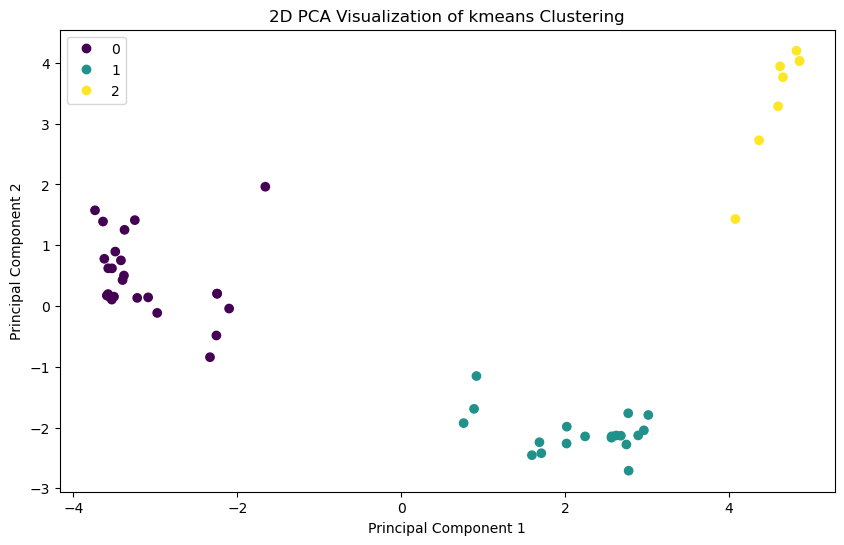

{'Silhouette Score': 0.2962693181754471,
 'Davies-Bouldin Score': 1.281428283934644}

In [26]:
data = Dataset(false_pos_df)
false_pos = data.featurise_df('substrate', 'fingerprint')
clustering = Clustering(method = 'kmeans', n_clusters = 3)
clustering.cluster(false_pos)
clustering.visualise(false_pos)
clustering.evaluate(false_pos)

In [20]:
false_pos_df['substrate'].value_counts()

substrate
S-adenosyl-L-methionine                  7
O2                                       7
ADP-ribose                               5
ATP                                      4
acetyl-CoA                               4
NAD                                      3
H                                        3
Smo                                      3
phosphate                                2
2''-O-acetyl-ADP-D-ribose                2
adenosine                                2
adenylyl sulfate                         2
3'-dephospho-CoA                         2
NADPH                                    2
H2O                                      2
glutathione                              1
CoA                                      1
GTP                                      1
ATPgammaS                                1
FADH2                                    1
AMP                                      1
L-glutamate                              1
L-histidine                              1
N